# SEN163A - Responsible Data Analytics
## Lab session 3: Preprocessing, Regression and Correlation analysis
### Delft University of Technology
### Q3 2022

**Instructor**: Dr. Ir. Jacopo De Stefani - J.deStefani@tudelft.nl

**TAs**: Antonio Sanchez Martin - A.SanchezMartin@student.tudelft.nl

#### Instructions

Lab session aim to:
- Show and reinforce how models and ideas presented in class are put to practice.
- Help you gather hands-on machine learning skills.

Lab sessions are:

- Learning environments where you work with Jupyter notebooks and where you can get support from TAs and fellow students.
- Not graded and do not have to be submitted.
- A good preparation for the assignments (which are graded).


### Application: Diagnostic analysis of a sleep dataset

In this lab session, we will explore how to combine multiple datasets related to personal health and sleep data, execute some data quality check and improvements, and finally perform regression and correlation analysis.
The example dataset is an extract from a study relating the sleep quality, to both some physiological quantities (e.g. age, gender, consumption of substances) as well as sleep measurement data.

#### Learning objectives
After completing the following exercises you will be able to:

1. Apply common preprocessing techniques to improve data quality: imputation, outlier removal and integrity checks
2. Apply feature engineering techniques: binning and feature multiplications
3. Merge multiple data sources to improve your analysis capabilities 
3. Perform a regression analysis and the corresponding statistical testing
4. Perform a correlation analysis and the corresponding statistical testing


## Activity 1 - Data preprocessing

Prior to any kind of further analysis, we need to perform some data quality check and address eventual issues that the data might have.

We are going to work with two datasets in the `sleep_data` directory:
- `personal_data.csv` : Containing personal informations about the different persons involved in the study
- `sleep_data.csv` : Containing sleep measurement about the different persons involved in the study


### Activity 1.1

Once you have imported the file containing personal data `personal_data.csv`, check whether all the columns are complete.

If there are any columns with missing data, how would you propose to deal with them?

Check the [Pandas documentation for missing data for any help](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html).

### Activity 1.2

After having performed data cleaning, bin the age variable in bins of 10 years each.


### Activity 1.3

With the cleaned data, perform exploratory data visualization to assess if there outliers/inconsistent data, for instance:

- Are there any children smoking?
- Are there any children consuming alcohol?

### Activity 1.4

Let's proceed with the similar data quality checks for the `sleep_data.csv` dataset.

If there are any columns with missing data, how would you propose to deal with them?

Check the [Pandas documentation for missing data for any help](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html).


### Activity 1.5

Convert the bed time and wakeup time columns to datetime and perform a consistency check on the data with respect to the sleep duration variable: Do the two values correspond?


### Activity 1.6

Perform an internal consitency check: 

- Sleep efficiency should be computed as the sum of two other existing variables, which ones?

- How would you verify your assumption?

### Activity 1.7

For further analysis, we would like to have the REM, Deep, and Light sleep durations instead of percentages.

Create derived features using the available data to represent the requested information.

### Activity 1.8 - Merge datasets

Now that all the proper preprocessing have been peformed on the original dataset, you can  proceed with merging `personal_data.csv` and `sleep_data.csv` in a single dataset `sleep_merged_df`.

## Activity 2 - Regression analysis

With the merged datasets, we would like to perform regression analysis, mostly for two purposes:

- Confirm the existence of relationships between the variables
- Discover the existence of new relationships between the variables


## Activity 2.1 - Regression on known relationship

Perform a linear regression analysis for:
- $y$ : Sleep efficiency
- $X$ : REM sleep percentage , Deep sleep percentage , Light sleep percentage

using the (pingouin)[https://pingouin-stats.org/build/html/index.html]

What result would you expect from the linear regression?

Check the p-values for the different coefficient, is any of them significant?

For more information about how to interpret results, please have a look [here](https://www.statology.org/read-interpret-regression-table/)


## Activity 2.2 - Regression on unknown relationship

Perform a linear regression analysis for:
- $y$ : Sleep efficiency
- $X$ : Age, Caffeine consumption, Alcohol consumption, Exercise frequency

using the (pingouin)[https://pingouin-stats.org/build/html/index.html]

What result would you expect from the linear regression?

Check the p-values for the different coefficient, is any of them significant?

For more information about how to interpret results, please have a look [here](https://www.statology.org/read-interpret-regression-table/)


## Activity 2.3 - Regression on unknown relationship with categorical variable

Perform a linear regression analysis for:
- $y$ : Sleep efficiency
- $X$ : Age, Caffeine consumption, Alcohol consumption, Exercise frequency, Smoking status

using the (pingouin)[https://pingouin-stats.org/build/html/index.html]

What result would you expect from the linear regression?

Check the p-values for the different coefficient, is any of them significant?

For more information about how to interpret results, please have a look [here](https://www.statology.org/read-interpret-regression-table/)

## Activity 3 - Correlation analysis

Last but not least, we would assess the presence of a correlation between the existing variables, in order to determine:

- Is any of the predictors $X$ correlated with the target variable to predict $y$?
- Are any of the predictors $X$ correlated with each other?

### Activity 3.1 - Correlation computation

Compute the correlation between the following (numerical) variables: `'Age', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency','REM sleep percentage', 'Deep sleep percentage','Light sleep percentage','Sleep efficiency'` 

### Activity 3.2 - Correlation visualization

Visualize the correlation using a (Seaborn)[https://seaborn.pydata.org/] heatmap.

### Activity 3.3. - Correlation testing

Perform a statistical testing using the `pearsonr` and `spearmanr` functions from the (Scipy.stats)[https://docs.scipy.org/doc/scipy/reference/stats.html] library and discuss the obtained results.

# Supplementary exercise - Correlation analysis with outliers

For deepening your knowledge about correlation, and more precisely, correlation between categorical variables, and between categorical and numerical variables, you can explore this resource, translated from [Emstrakov Kaggle Notebook](https://www.kaggle.com/code/emstrakhov/lesson-2-correlation-analysis)


## EDA: data understanding, visual and correlation analysis

The purpose of this lecture will be to continue learning the practical foundations of exploratory analysis using the Pandas library --- data grouping, counting, visualization, working with missing values. We will also get acquainted with the analysis of correlations between features and statistical tests.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

In [2]:
df = pd.read_csv('../input/cardio_train.csv', sep=';', index_col=0)

In [3]:
df.head().T

id                 0        1        2        3        4
age          18393.0  20228.0  18857.0  17623.0  17474.0
gender           2.0      1.0      1.0      2.0      1.0
height         168.0    156.0    165.0    169.0    156.0
weight          62.0     85.0     64.0     82.0     56.0
ap_hi          110.0    140.0    130.0    150.0    100.0
ap_lo           80.0     90.0     70.0    100.0     60.0
cholesterol      1.0      3.0      3.0      1.0      1.0
gluc             1.0      1.0      1.0      1.0      1.0
smoke            0.0      0.0      0.0      0.0      0.0
alco             0.0      0.0      0.0      0.0      0.0
active           1.0      1.0      0.0      1.0      0.0
cardio           0.0      1.0      1.0      1.0      0.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


The results of applying the info() method showed that this dataset contains only numeric features. However, this should not mislead the researcher: categorical features are often encoded by numbers. Moreover, in order to build machine learning models, **all** features must be numeric.

For example, traits such as **gender**, **smoke**, **alco**, **active**, and the target trait **cardio** are **categorical**. In the table, the values of these features are encoded by numbers, but on the sets of these numbers, the order relations (greater than, less than, greater than or equal to, less than or equal to) do not make sense.

The features **cholesterol** and **gluc** refer to **ordinal** features, i.e., category conventions for which an order relation makes sense. For example, **cholesterol=1** means **lower** cholesterol than **cholesterol=2**.

All other features can be treated as **numeric continuous** (despite the fact that some of them are represented only by integers).

Let's single out numerical features in a separate group and consider some of the simplest types of correlation analysis of such data.

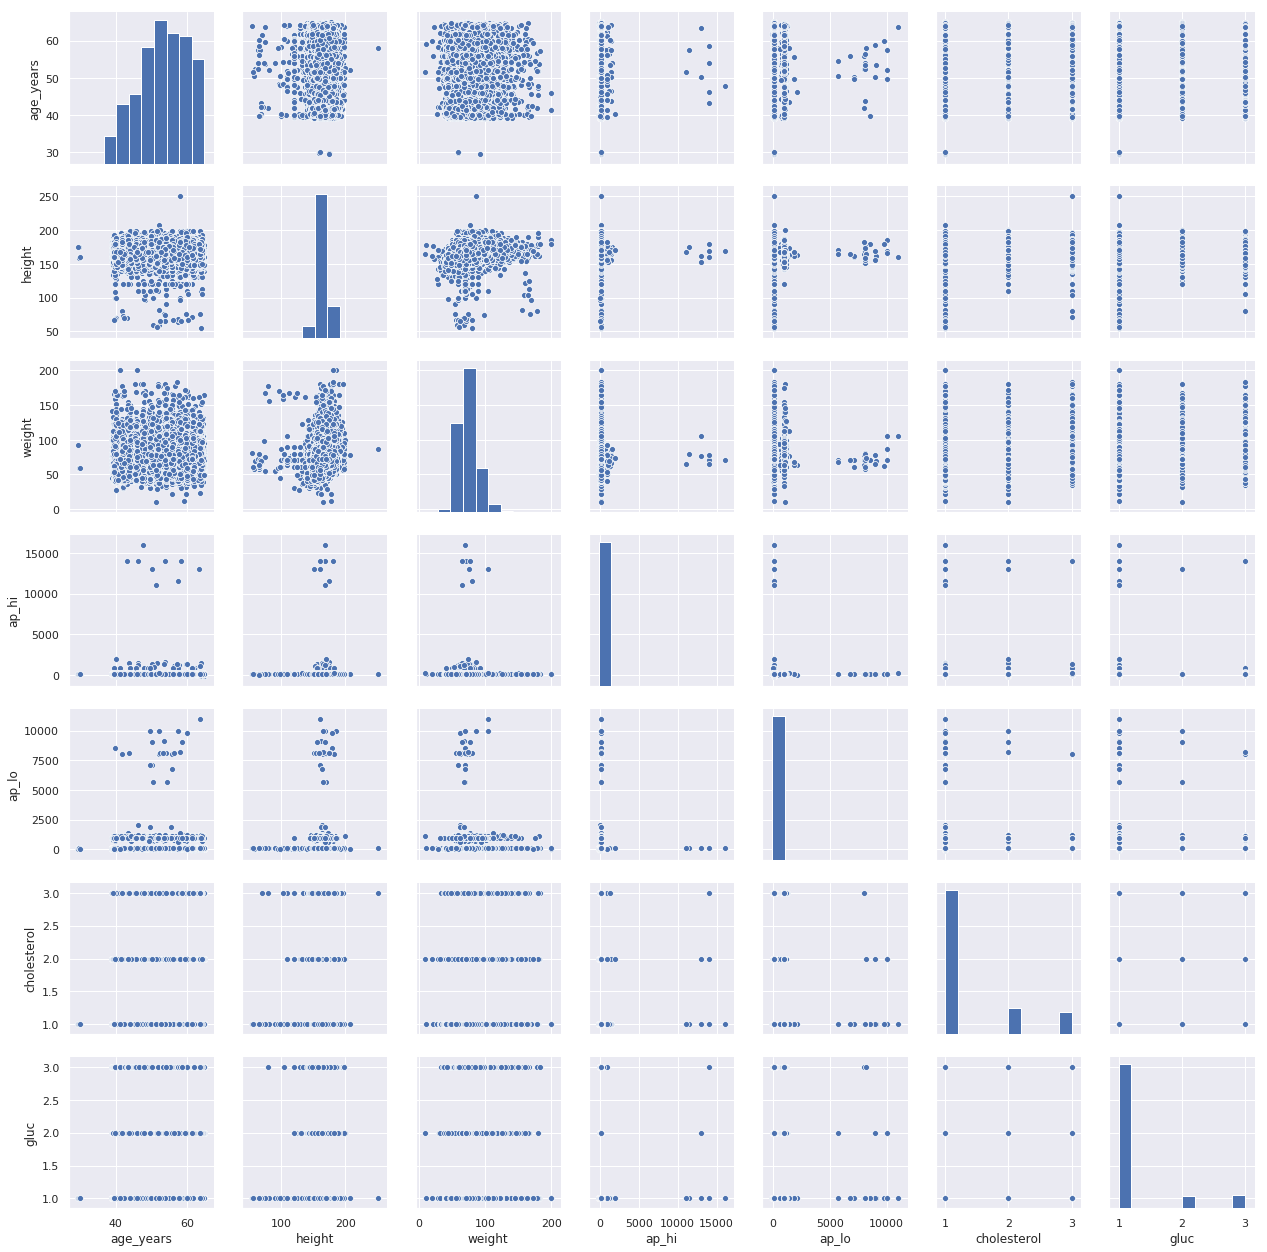

In [5]:
df['age_years'] = df['age'] / 365.25 # возраст в годах
numeric = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']
sns.pairplot(df[numeric]);

Вспомним, что в данных есть выбросы --- явно некорректные значения, которые будут мешать дальнейшей работе. Удалим их.

Recall that there are outliers in the data --- clearly incorrect values that will interfere with further work. Let's delete them.

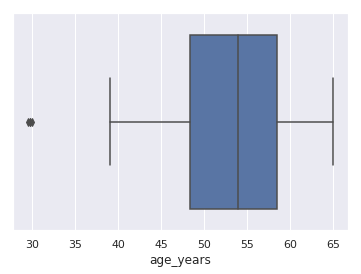

In [6]:
sns.boxplot(df['age_years']);

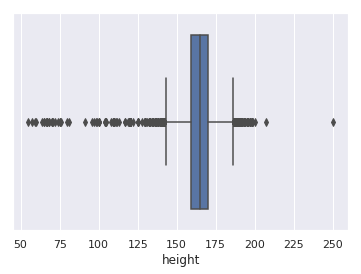

In [7]:
sns.boxplot(df['height']);

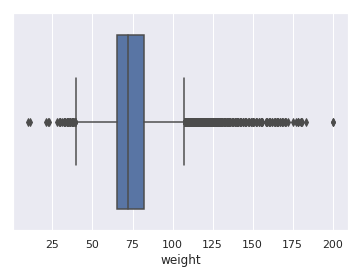

In [8]:
sns.boxplot(df['weight']);

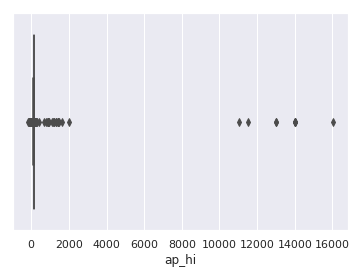

In [9]:
sns.boxplot(df['ap_hi']);

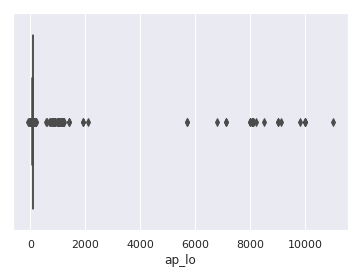

In [10]:
sns.boxplot(df['ap_lo']);

In [11]:
def outliers_indices(feature):
    '''
    Будем считать выбросами все точки, выходящие за пределы трёх сигм.
    '''
    mid = df[feature].mean()
    sigma = df[feature].std()
    return df[(df[feature] < mid - 3*sigma) | (df[feature] > mid + 3*sigma)].index

In [12]:
wrong_height = outliers_indices('height')
wrong_weight = outliers_indices('weight')
wrong_hi = outliers_indices('ap_hi')
wrong_lo = outliers_indices('ap_lo')

out = set(wrong_height) | set(wrong_weight) | set(wrong_hi) | set(wrong_lo)

print(len(out))

1929


1929 outliers will be removed from the data set, which is not significant in this case.

In [13]:
df.drop(out, inplace=True)

Let's build Spearman's correlation matrix for numerical features without taking into account outlier objects.

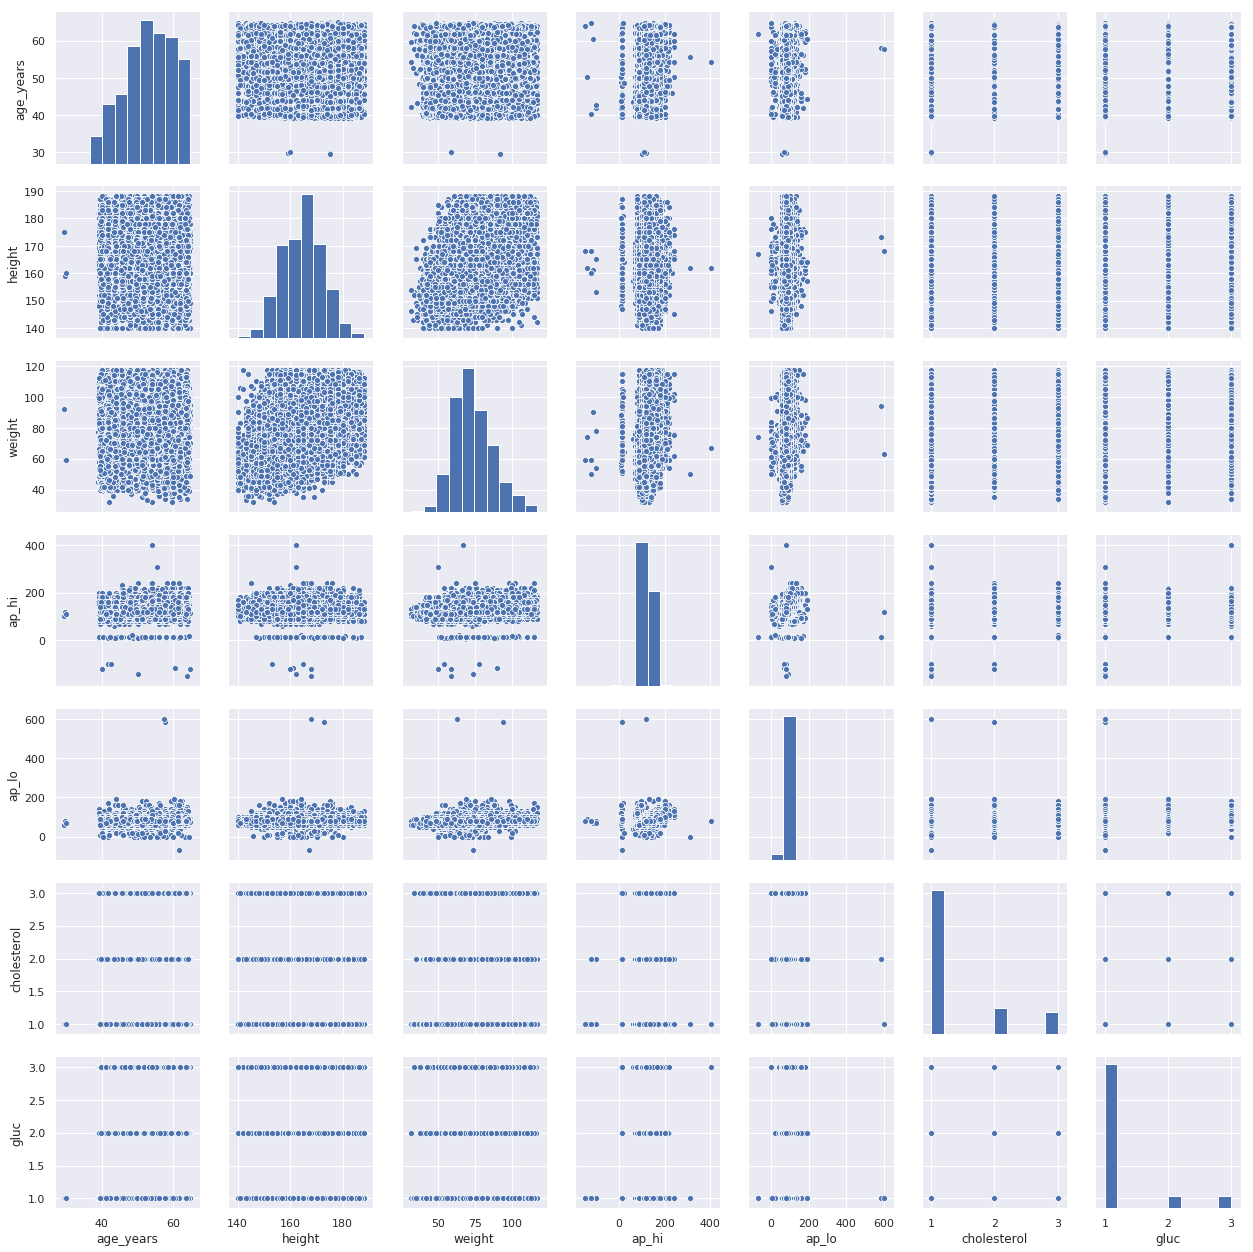

In [14]:
sns.pairplot(df[numeric]);

In [15]:
df[numeric].corr(method='spearman')

age_years    height    ...     cholesterol      gluc
age_years     1.000000 -0.080755    ...        0.142255  0.092413
height       -0.080755  1.000000    ...       -0.062429 -0.026099
weight        0.066402  0.312419    ...        0.132306  0.103824
ap_hi         0.223776  0.017144    ...        0.205921  0.101733
ap_lo         0.160284  0.028388    ...        0.164351  0.079457
cholesterol   0.142255 -0.062429    ...        1.000000  0.405530
gluc          0.092413 -0.026099    ...        0.405530  1.000000

[7 rows x 7 columns]

The [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function of the Seaborn library provides a convenient way to visualize such matrices.

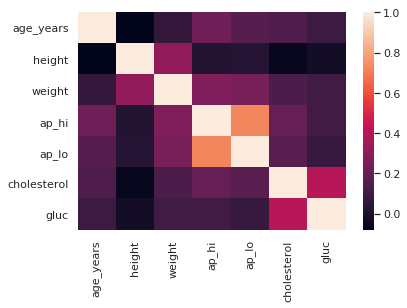

In [16]:
sns.heatmap(df[numeric].corr(method='spearman'));

What conclusions can be drawn? The highest correlation is observed between the variables **ap_hi** and **ap_lo**. The correlation between height and weight, as well as cholesterol and glucose levels, is quite high. In addition, it can be seen that weight is more related to pressure than height.

## Statistical tests

It was said above that the correlation between height and weight is _quite high_, and _weight is more related to pressure than height_. The time has come to give a more rigorous color to our conclusions. Let's talk about the **statistical significance** of the identified relationships. In other words, **how high** must the degree of correlation be to be able to talk about any **non-random relationship** between features at all?

### The stats module of the SciPy library

The [stats](https://docs.scipy.org/doc/scipy/reference/stats.html) module of the SciPy library contains several built-in functions for calculating correlation coefficients between features of different nature, as well as testing them for statistical significance.

In [17]:
from scipy.stats import pearsonr, spearmanr, kendalltau
r = pearsonr(df['height'], df['weight'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

Pearson correlation: 0.3142873661362631 p-value: 0.0


In [18]:
r = pearsonr(df['cholesterol'], df['weight'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

Pearson correlation: 0.1378005108534901 p-value: 9.348547579785181e-286


In [19]:
r = spearmanr(df['cholesterol'], df['weight'])
print('Spearman correlation:', r[0], 'p-value:', r[1])

Spearman correlation: 0.13230579095093412 p-value: 2.1550632494593984e-263


Since the p-value < 0.05 (typical threshold), we conclude that the relationship (correlation) between height and weight is **statistically significant**.

Let's check whether the correlation of height and pressure is really statistically insignificant, in contrast to the correlation of weight and pressure. Let's use Pearson's correlation coefficient again.

In [20]:
r_height_pressure = pearsonr(df['height'], df['ap_hi'])
print('Height vs. Pressure:', r_height_pressure)
r_weight_pressure = pearsonr(df['weight'], df['ap_hi'])
print('Weight vs. Pressure:', r_weight_pressure)

Height vs. Pressure: (0.010717520992153973, 0.005169536660837144)
Weight vs. Pressure: (0.24423383377175817, 0.0)


As you can see, the p-values in both cases are quite small, so we have **no reason** to say that there is no **statistically proven relationship** between growth and pressure. The fact that the value of $r=0.01$ turned out to be significant may be due to the large sample length. However, in any case, the correlation between pressure and height is significantly less than the correlation between pressure and weight.

## Analysis of correlations of categorical features

Correlation between categorical variables cannot be measured using the Pearson, Spearman, and Kendall coefficients. Coefficients and inferences for categorical data are usually built on the basis of **contingency tables** (cross-tabs, contingency tables).

Consider the relationship between smoking and cardiovascular disease. Let's build a cross table.

In [21]:
pd.crosstab(df['smoke'], df['cardio'])

cardio      0      1
smoke               
0       31348  30787
1        3175   2761

At this stage, it's hard to say anything. Let's try to calculate the coefficient $\chi^2$.

In [23]:
from scipy.stats import chi2_contingency, fisher_exact
chi2_contingency(pd.crosstab(df['smoke'], df['cardio']))

(19.85673527332828,
 8.34681250322075e-06,
 1,
 array([[31512.48850465, 30622.51149535],
        [ 3010.51149535,  2925.48850465]]))

A low p-value indicates that the relationship is statistically confirmed. In this case, smokers have a lower propensity for CVD. The same conclusion is confirmed by the Fisher test.

In [24]:
fisher_exact(pd.crosstab(df['smoke'], df['cardio']))

(0.885452245029283, 7.799832072146025e-06)

For $2\times 2$ contingency tables, there are also other indicators of the degree of closeness of statistical connection: association coefficient, contingency coefficient, collage coefficient, Goodman-Kruskal coefficient.

## Relationship between categorical and numerical features

In the case of a binary categorical feature and a numeric feature, we can apply a biserial correlation coefficient. For example, consider the relationship between weight and cardiovascular disease.

In [25]:
from scipy.stats import pointbiserialr
pointbiserialr(df['cardio'], df['weight'])

PointbiserialrResult(correlation=0.1789197190582539, pvalue=0.0)

And again the connection was confirmed.